# Insatll required librarys

In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [3]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


### How to handle categorical missing values

#### Frequant category imputation

In [4]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [5]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [6]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequancy with every feature

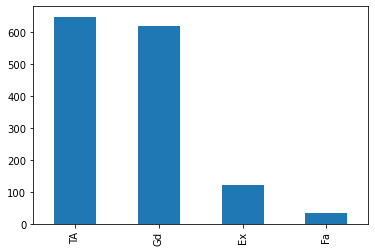

In [7]:
df['BsmtQual'].value_counts().plot.bar()

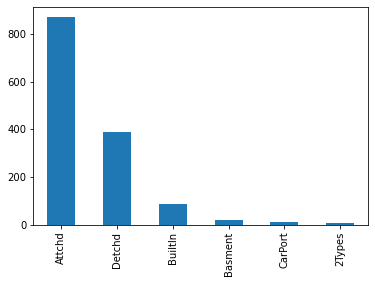

In [8]:
df['GarageType'].value_counts().plot.bar()

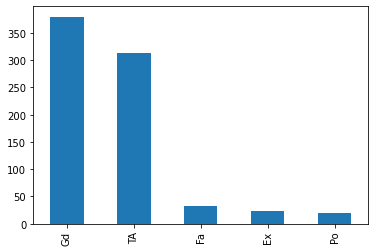

In [9]:
df['FireplaceQu'].value_counts().plot.bar()

In [10]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [11]:
df['GarageType'].mode()[0]

'Attchd'

In [12]:
def impute_nan(df,variable):
    most_frequant_category=df[variable].mode()[0]
    df[variable].fillna(most_frequant_category,inplace=True)
    

In [13]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [14]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,i)

In [15]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [16]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Adding a variable to capture nan

In [17]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [18]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [19]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [20]:
def capture_na(df,variable):
    df[variable+'_na']=np.where(df[variable].isnull(),1,0)

In [21]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    capture_na(df,i)

In [22]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_na,FireplaceQu_na,GarageType_na
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [23]:
def impute_na(df,variable):
    frequant=df[variable].mode()[0]
    df[variable].fillna(frequant,inplace=True)

In [24]:
for i in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_na(df,i)

In [25]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_na,FireplaceQu_na,GarageType_na
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0


In [26]:
df.isnull().sum()

BsmtQual          0
FireplaceQu       0
GarageType        0
SalePrice         0
BsmtQual_na       0
FireplaceQu_na    0
GarageType_na     0
dtype: int64

## Order nominal encoding

In [27]:
data=pd.read_excel('../input/flight-fare-prediction-mh/Data_Train.xlsx',usecols=['Airline','Source','Destination','Price'])
data.head()

,Airline,Source,Destination,Price
0,IndiGo,Banglore,New Delhi,3897
1,Air India,Kolkata,Banglore,7662
2,Jet Airways,Delhi,Cochin,13882
3,IndiGo,Kolkata,Banglore,6218
4,IndiGo,Banglore,New Delhi,13302


In [28]:
data.isnull().sum()

Airline        0
Source         0
Destination    0
Price          0
dtype: int64

In [29]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### See the airlines has different prices and allowances we can't sure certain plain is best in this case we encoded by ordinal

In [30]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [31]:
dict={'IndiGo':1, 'Air India':2, 'Jet Airways':0, 'SpiceJet':4,
       'Multiple carriers':3, 'GoAir':7, 'Vistara':5, 'Air Asia':6,
       'Vistara Premium economy':10, 'Jet Airways Business':9,
       'Multiple carriers Premium economy':8, 'Trujet':11}

In [32]:
data['Airline_new']=data['Airline'].map(dict)

In [33]:
data.head(20)

,Airline,Source,Destination,Price,Airline_new
0,IndiGo,Banglore,New Delhi,3897,1
1,Air India,Kolkata,Banglore,7662,2
2,Jet Airways,Delhi,Cochin,13882,0
3,IndiGo,Kolkata,Banglore,6218,1
4,IndiGo,Banglore,New Delhi,13302,1
5,SpiceJet,Kolkata,Banglore,3873,4
6,Jet Airways,Banglore,New Delhi,11087,0
7,Jet Airways,Banglore,New Delhi,22270,0
8,Jet Airways,Banglore,New Delhi,11087,0
9,Multiple carriers,Delhi,Cochin,8625,3


#### Count or frequancy encoding

In [34]:
df= pd.read_csv("../input/mercedesbenz-greener-manufacturing/train.csv",usecols=['ID','y','X0','X1','X2','X3','X4','X5','X6'])
pd.pandas.set_option('display.max_columns',None)

In [35]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6
0,0,130.81,k,v,at,a,d,u,j
1,6,88.53,k,t,av,e,d,y,l
2,7,76.26,az,w,n,c,d,x,j
3,9,80.62,az,t,n,f,d,x,l
4,13,78.02,az,v,n,f,d,h,d


In [36]:
for i in df.columns[:]:
    print(i,":",len(df[i].unique()),'labels')

ID : 4209 labels
y : 2545 labels
X0 : 47 labels
X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [37]:
x_zero=df['X0'].value_counts().to_dict()
x_zero

{'z': 360,
 'ak': 349,
 'y': 324,
 'ay': 313,
 't': 306,
 'x': 300,
 'o': 269,
 'f': 227,
 'n': 195,
 'w': 182,
 'j': 181,
 'az': 175,
 'aj': 151,
 's': 106,
 'ap': 103,
 'h': 75,
 'd': 73,
 'al': 67,
 'v': 36,
 'af': 35,
 'm': 34,
 'ai': 34,
 'e': 32,
 'ba': 27,
 'at': 25,
 'a': 21,
 'ax': 19,
 'i': 18,
 'am': 18,
 'aq': 18,
 'u': 17,
 'aw': 16,
 'l': 16,
 'ad': 14,
 'au': 11,
 'b': 11,
 'k': 11,
 'as': 10,
 'r': 10,
 'bc': 6,
 'ao': 4,
 'c': 3,
 'aa': 2,
 'q': 2,
 'g': 1,
 'ac': 1,
 'ab': 1}

In [38]:
df['X0']=df['X0'].map(x_zero)

In [39]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6
0,0,130.81,11,v,at,a,d,u,j
1,6,88.53,11,t,av,e,d,y,l
2,7,76.26,175,w,n,c,d,x,j
3,9,80.62,175,t,n,f,d,x,l
4,13,78.02,175,v,n,f,d,h,d


#### Target guided ordinal encoding

In [40]:
df=pd.read_csv('../input/titanicdataset-traincsv/train.csv',usecols=['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [41]:
df.isnull().sum()

Survived      0
Cabin       687
dtype: int64

In [42]:
df['Cabin'].fillna('Missing',inplace=True)

In [43]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [44]:
df['Cabin']= df['Cabin'].astype(str).str[0]

In [45]:
df.Cabin.head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [46]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [47]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [48]:
oder_label=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
oder_label

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [49]:
enumerate(oder_label,0)

In [51]:
oder_2={k:i for i,k in enumerate(oder_label,0
                                )}
oder_2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [52]:
df['Cabin_with_target']=df['Cabin'].map(oder_2)

In [53]:
df.head()

,Survived,Cabin,Cabin_with_target
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


#### Mean encoding

In [59]:
df_c=df.groupby(['Cabin'])['Survived'].mean().sort_values().to_dict()
df_c

{'T': 0.0,
 'M': 0.29985443959243085,
 'A': 0.4666666666666667,
 'G': 0.5,
 'C': 0.5932203389830508,
 'F': 0.6153846153846154,
 'B': 0.7446808510638298,
 'E': 0.75,
 'D': 0.7575757575757576}

In [60]:
df['Cabin_mean_encoding']=df['Cabin'].map(df_c)

In [61]:
df.head()

,Survived,Cabin,Cabin_with_target,Cabin_mean_encoding
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


## Nominal encoding---In this type of encoding we don't worry about the oredering or ranking of the variables.

In [74]:
train_set=pd.read_csv('../input/titanicdataset-traincsv/train.csv',usecols=['Survived','Sex','Embarked'])
train_set.head()

,Survived,Sex,Embarked
0,0,male,S
1,1,female,C
2,1,female,S
3,1,female,S
4,0,male,S


In [77]:
sex_c=pd.get_dummies(train_set['Sex'],drop_first=True)
sex_c

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [78]:
embark= pd.get_dummies(train_set['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [84]:
train_set=pd.concat([train_set,sex_c,embark],axis=1)

In [85]:
train_set.head()


,Survived,Sex,Embarked,male,Q,S
0,0.0,male,S,NaN,NaN,NaN
1,1.0,female,C,NaN,NaN,NaN
2,1.0,female,S,NaN,NaN,NaN
3,1.0,female,S,NaN,NaN,NaN
4,0.0,male,S,NaN,NaN,NaN
